# Stress-Strain Curves (True and Engineering)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Here, a function is defined to load the the data from the experimental file. The data is then loaded and slilced to the correct length (up until the point of fracture).

In [2]:
def read_data(file):
    return np.loadtxt(file, usecols = (3,9), skiprows=10, delimiter=',')

RD_A = read_data('../Data/Instron/RD_Timet_A.csv')[0:2238]
RD_B = read_data('../Data/Instron/RD_Timet_B.csv')[0:2359]
TD_A = read_data('../Data/Instron/TD_Timet_A.csv')[0:2582]
TD_B = read_data('../Data/Instron/TD_Timet_B.csv')[0:2568]
FFD_A = read_data('../Data/Instron/45degree_Timet_A.csv')[0:3005]
FFD_B = read_data('../Data/Instron/45degree_Timet_B.csv')[0:2928]

This data can then be converted into true stress and strain, using the following functions. Note that this true stress/strain data is not technically valid after the point of necking, however it has not been sliced to this point yet, as it will be needed later.

In [3]:
def true_stress(stress,strain):
    return stress*(1+(strain/100))
def true_strain(strain):
    return (np.log(1+(strain/100)))

RD_A_True = np.column_stack((true_stress(RD_A[:,0],RD_A[:,1]),true_strain(RD_A[:,1])))
RD_B_True = np.column_stack((true_stress(RD_B[:,0],RD_B[:,1]),true_strain(RD_B[:,1])))
TD_A_True = np.column_stack((true_stress(TD_A[:,0],TD_A[:,1]),true_strain(TD_A[:,1])))
TD_B_True = np.column_stack((true_stress(TD_B[:,0],TD_B[:,1]),true_strain(TD_B[:,1])))
FFD_A_True = np.column_stack((true_stress(FFD_A[:,0],FFD_A[:,1]),true_strain(FFD_A[:,1])))
FFD_B_True = np.column_stack((true_stress(FFD_B[:,0],FFD_B[:,1]),true_strain(FFD_B[:,1])))

A funciton is now defined for plotting stress-strain curves:

In [4]:
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]

def plot_stress_strain (x,y,title,n):
    if 'RD_A' in namestr(n, globals()):
        name='Rolling Direction, Sample A'
    if 'RD_B' in namestr(n, globals()):
        name='Rolling Direction, Sample B'
    if 'TD_A' in namestr(n, globals()):
        name='Transverse Direction, Sample A'
    if 'TD_B' in namestr(n, globals()):
        name='Transverse Direction, Sample B'
    if 'FFD_A' in namestr(n, globals()):
        name='45 Degrees, Sample A'
    if 'FFD_B' in namestr(n, globals()):
        name='45 Degrees, Sample B'
    if 'True' in namestr(n, globals()):
        xaxis='True Strain'
        yaxis='True Stress (MPa)'
    else:
        xaxis='Engineering Strain (%)'
        yaxis='Engineering Stress (MPa)'
    plt.plot(x,y,label=name)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.legend(loc='best')
    plt.title(title);

### Engineering Stress-Strain Curves

Here the engineering stress-strain curves are plotted, both for comparing directions for the same sample, and for comparing samples for the same direction.

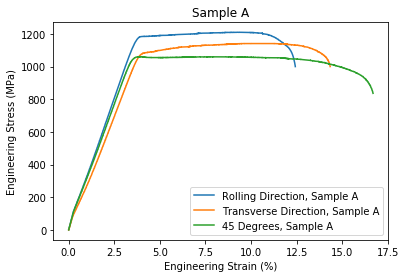

In [9]:
plot_stress_strain(RD_A[:,1],RD_A[:,0],'',RD_A)
plot_stress_strain(TD_A[:,1],TD_A[:,0],'',TD_A)
plot_stress_strain(FFD_A[:,1],FFD_A[:,0],'Sample A',FFD_A)
plt.savefig('Sample_A_Engineering_Instron.png')

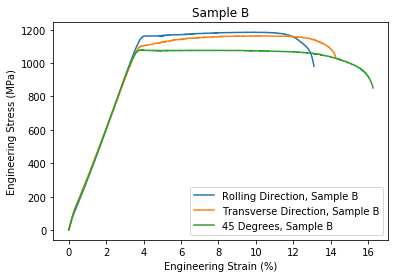

In [10]:
plot_stress_strain(RD_B[:,1],RD_B[:,0],'',RD_B)
plot_stress_strain(TD_B[:,1],TD_B[:,0],'',TD_B)
plot_stress_strain(FFD_B[:,1],FFD_B[:,0],'Sample B',FFD_B)
plt.savefig('Sample_B_Engineering_Instron.png')

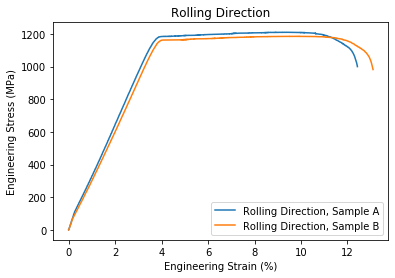

In [14]:
plot_stress_strain(RD_A[:,1],RD_A[:,0],'',RD_A)
plot_stress_strain(RD_B[:,1],RD_B[:,0],'Rolling Direction',RD_B)
plt.savefig('RD_Engineering_Instron.png')

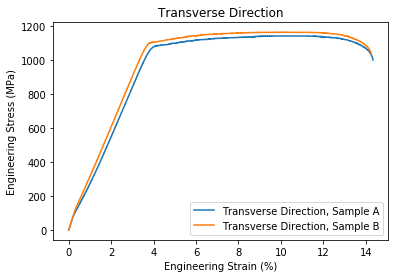

In [16]:
plot_stress_strain(TD_A[:,1],TD_A[:,0],'',TD_A)
plot_stress_strain(TD_B[:,1],TD_B[:,0],'Transverse Direction',TD_B)
plt.savefig('TD_Engineering_Instron.png')

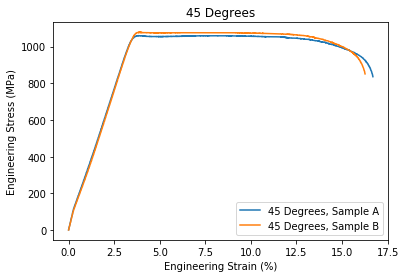

In [18]:
plot_stress_strain(FFD_A[:,1],FFD_A[:,0],'',FFD_A)
plot_stress_strain(FFD_B[:,1],FFD_B[:,0],'45 Degrees',FFD_B)
plt.savefig('45deg_Engineering_Instron.png')

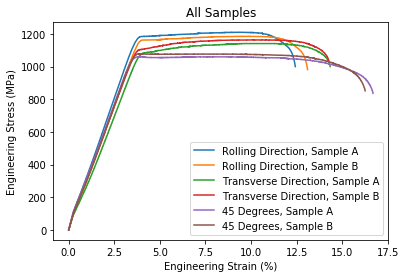

In [19]:
plot_stress_strain(RD_A[:,1],RD_A[:,0],'',RD_A)
plot_stress_strain(RD_B[:,1],RD_B[:,0],'',RD_B)
plot_stress_strain(TD_A[:,1],TD_A[:,0],'',TD_A)
plot_stress_strain(TD_B[:,1],TD_B[:,0],'',TD_B)
plot_stress_strain(FFD_A[:,1],FFD_A[:,0],'',FFD_A)
plot_stress_strain(FFD_B[:,1],FFD_B[:,0],'All Samples',FFD_B)
plt.savefig('All_Samples_Engineering_Instron.png')

### True Stress-Strain Curves

Here the same graphs are plotted as above, but this time with the true stress-strain data.

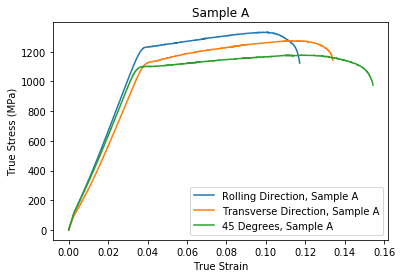

In [20]:
plot_stress_strain(RD_A_True[:,1],RD_A_True[:,0],'',RD_A_True)
plot_stress_strain(TD_A_True[:,1],TD_A_True[:,0],'',TD_A_True)
plot_stress_strain(FFD_A_True[:,1],FFD_A_True[:,0],'Sample A',FFD_A_True)
plt.savefig('Sample_A_True_Instron.png')

For this graph (above) it can be seen that there is some slight variation in Youngs modulus between samples, and that all three curves show some work hardening (as all lines go up after yield). The work hardening looks largest for transverse direction and similar for rolling and 45 degrees, whereas the yield point is much higher for rolling than transverse and 45 degrees (and it is similar for the latter two). Here, ductility is greatest for 45 degrees and lowest for rolling direction (based on elongation before necking occurs). UTS is highest for rolling, then transverse and then 45 degrees.

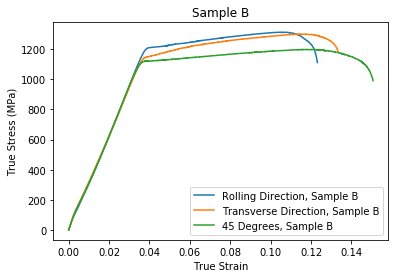

In [22]:
plot_stress_strain(RD_B_True[:,1],RD_B_True[:,0],'',RD_B_True)
plot_stress_strain(TD_B_True[:,1],TD_B_True[:,0],'',TD_B_True)
plot_stress_strain(FFD_B_True[:,1],FFD_B_True[:,0],'Sample B',FFD_B_True)
plt.savefig('Sample_B_True_Instron.png')

For this graph (above), all of the observations made for the previous graphs still stand, except here, Youngs modulus is very consistant between all directions.

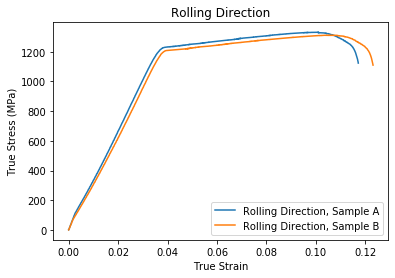

In [23]:
plot_stress_strain(RD_A_True[:,1],RD_A_True[:,0],'',RD_A_True)
plot_stress_strain(RD_B_True[:,1],RD_B_True[:,0],'Rolling Direction',RD_B_True)
plt.savefig('RD_True_Instron.png')

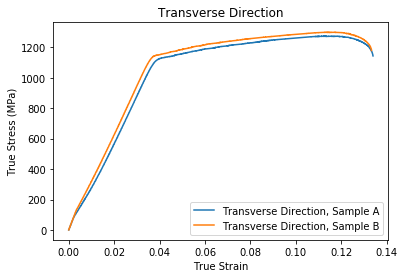

In [24]:
plot_stress_strain(TD_A_True[:,1],TD_A_True[:,0],'',TD_A_True)
plot_stress_strain(TD_B_True[:,1],TD_B_True[:,0],'Transverse Direction',TD_B_True)
plt.savefig('TD_True_Instron.png')

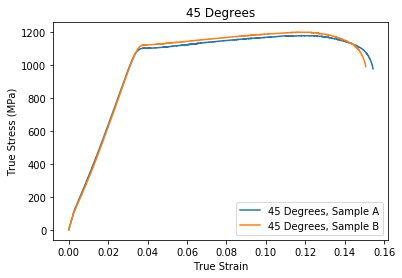

In [25]:
plot_stress_strain(FFD_A_True[:,1],FFD_A_True[:,0],'',FFD_A_True)
plot_stress_strain(FFD_B_True[:,1],FFD_B_True[:,0],'45 Degrees',FFD_B_True)
plt.savefig('45deg_True_Instron.png')

For all three of the above graphs, all repeats are shown to have similar youngs modulus, work hardening, ductility, yield stress and UTS. In general, the graphs comparing samples show have much smaller differences than the graphs comparing directions. This is ideal as it means that repeats are accurate enough to be able to use the data, and hence means that we can use the comparing directions graphs to look at what differences each loading direction gives.

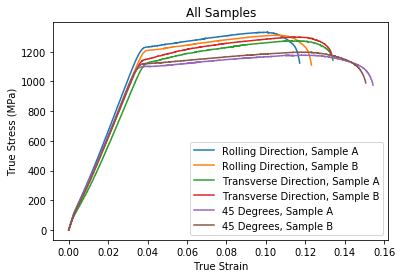

In [26]:
plot_stress_strain(RD_A_True[:,1],RD_A_True[:,0],'',RD_A_True)
plot_stress_strain(RD_B_True[:,1],RD_B_True[:,0],'',RD_B_True)

plot_stress_strain(TD_A_True[:,1],TD_A_True[:,0],'',TD_A_True)
plot_stress_strain(TD_B_True[:,1],TD_B_True[:,0],'',TD_B_True)

plot_stress_strain(FFD_A_True[:,1],FFD_A_True[:,0],'',FFD_A_True)
plot_stress_strain(FFD_B_True[:,1],FFD_B_True[:,0],'All Samples',FFD_B_True)

plt.savefig('All_Samples_True_Instron.png')